In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C://Users//NANDANA//Claims//data//fake_data.csv")

In [3]:
print(df.head())

  Claim_Number   Excess                          Circumstance  \
0    CLM100199   324.97                  Insured opening door   
1    CLM103337  1230.03    Third Party Vehicle changing lanes   
2    CLM101054   441.62                  Insured opening door   
3    CLM100825   429.75  Third Party Emerging from minor road   
4    CLM102874  1523.44             Insured Vehicle reversing   

  OrganizationNotifiedBy MethodofNotification NCD_Indicator  \
0                   Self                Phone            No   
1            Nameddriver                Phone           Yes   
2                     TP                Phone            No   
3                     TP                Email           Yes   
4                 Broker                Phone            No   

   Notification_Delay  Injury  ThirdPartyVehicleDamage  InsuredVehicleDamage  \
0                24.0       0                        1                     1   
1                 0.0       1                        1                

In [4]:
print("Dim :", df.shape)

Dim : (3800, 13)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Claim_Number             3800 non-null   object 
 1   Excess                   3800 non-null   float64
 2   Circumstance             3800 non-null   object 
 3   OrganizationNotifiedBy   3800 non-null   object 
 4   MethodofNotification     3800 non-null   object 
 5   NCD_Indicator            3800 non-null   object 
 6   Notification_Delay       3637 non-null   float64
 7   Injury                   3800 non-null   int64  
 8   ThirdPartyVehicleDamage  3800 non-null   int64  
 9   InsuredVehicleDamage     3800 non-null   int64  
 10  Insured_age              3800 non-null   int64  
 11  EstimatedVehicleValue    3689 non-null   float64
 12  Liability_group          3800 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 386.1+ KB
None


In [6]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [7]:
print("Column Names:", df.columns.tolist())

Column Names: ['Claim_Number', 'Excess', 'Circumstance', 'OrganizationNotifiedBy', 'MethodofNotification', 'NCD_Indicator', 'Notification_Delay', 'Injury', 'ThirdPartyVehicleDamage', 'InsuredVehicleDamage', 'Insured_age', 'EstimatedVehicleValue', 'Liability_group']


In [8]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Claim_Number                 0
Excess                       0
Circumstance                 0
OrganizationNotifiedBy       0
MethodofNotification         0
NCD_Indicator                0
Notification_Delay         163
Injury                       0
ThirdPartyVehicleDamage      0
InsuredVehicleDamage         0
Insured_age                  0
EstimatedVehicleValue      111
Liability_group              0
dtype: int64


In [9]:
print(df.describe().T)

                          count          mean           std      min      25%  \
Excess                   3800.0    869.192803    924.013120    21.02   358.77   
Notification_Delay       3637.0     40.497388     27.636198     0.00    20.00   
Injury                   3800.0      0.448684      0.497425     0.00     0.00   
ThirdPartyVehicleDamage  3800.0      0.608158      0.488226     0.00     0.00   
InsuredVehicleDamage     3800.0      0.904211      0.294341     0.00     1.00   
Insured_age              3800.0     35.193684     11.092962    18.00    27.00   
EstimatedVehicleValue    3689.0  19482.271347  16511.130287  1655.00  9311.00   

                               50%         75%        max  
Excess                     608.485   1077.5375   17739.69  
Notification_Delay          39.000     59.0000     140.00  
Injury                       0.000      1.0000       1.00  
ThirdPartyVehicleDamage      1.000      1.0000       1.00  
InsuredVehicleDamage         1.000      1.0000     

In [10]:
id_cols = ['Claim_Number']
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categ_cols = df.select_dtypes(include=['object']).columns.tolist()

In [11]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [12]:
print(df.isnull().sum())

Claim_Number               0
Excess                     0
Circumstance               0
OrganizationNotifiedBy     0
MethodofNotification       0
NCD_Indicator              0
Notification_Delay         0
Injury                     0
ThirdPartyVehicleDamage    0
InsuredVehicleDamage       0
Insured_age                0
EstimatedVehicleValue      0
Liability_group            0
dtype: int64


In [13]:
categ_cols = [col
    for col in categ_cols
    if col not in id_cols]
bin_cols = [col for col in num_cols if df[col].nunique (dropna=False)==2]
categ_cols.extend(bin_cols)
num_cols = [col for col in num_cols if col not in bin_cols]

In [14]:
print("Numerical columns : ", num_cols)

Numerical columns :  ['Excess', 'Notification_Delay', 'Insured_age', 'EstimatedVehicleValue']


In [15]:
print("Categorical columns : ", categ_cols)

Categorical columns :  ['Circumstance', 'OrganizationNotifiedBy', 'MethodofNotification', 'NCD_Indicator', 'Liability_group', 'Injury', 'ThirdPartyVehicleDamage', 'InsuredVehicleDamage']


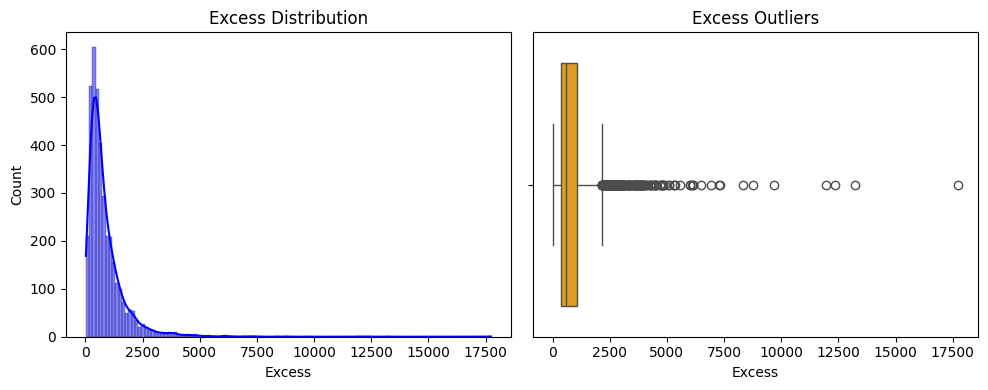

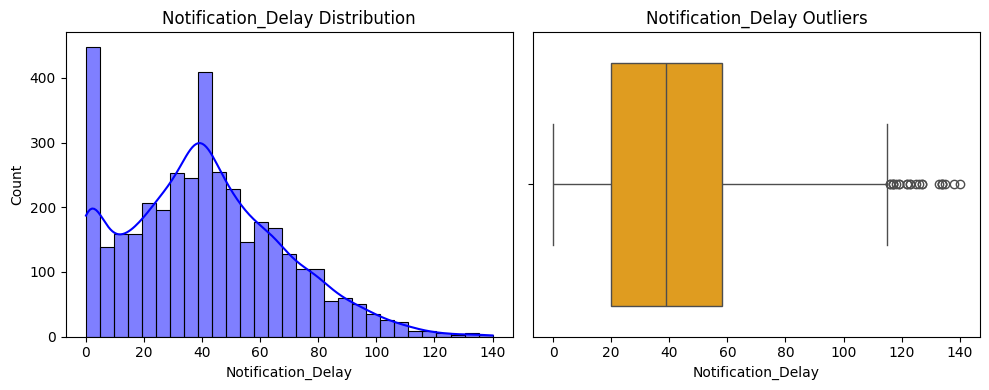

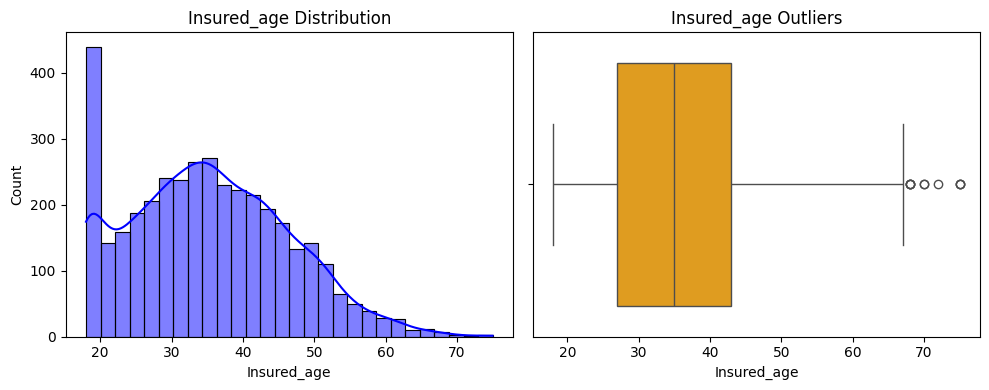

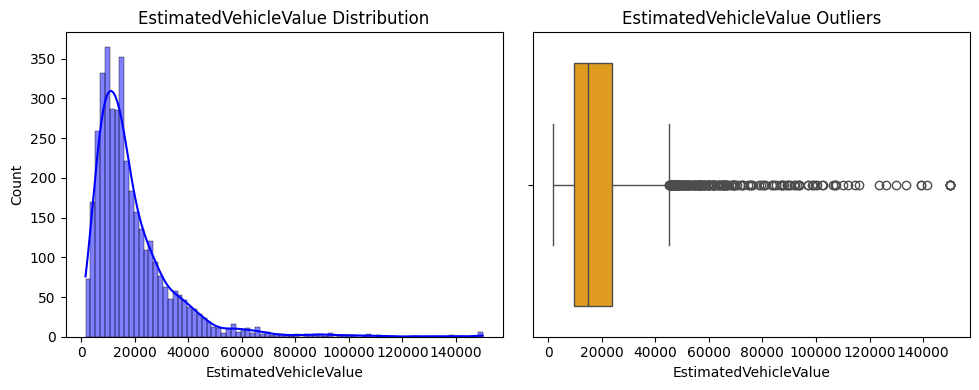

In [16]:
for col in num_cols:
    plt. figure(figsize=(10,4))
    plt. subplot (1,2,1)
    sns.histplot(df[col], kde=True, color="blue")
    plt. title(f"{col} Distribution")
    plt. subplot (1,2,2)
    sns.boxplot(x=df[col], color="orange")
    plt. title(f"{col} Outliers")
    plt. tight_layout()
    plt. show()

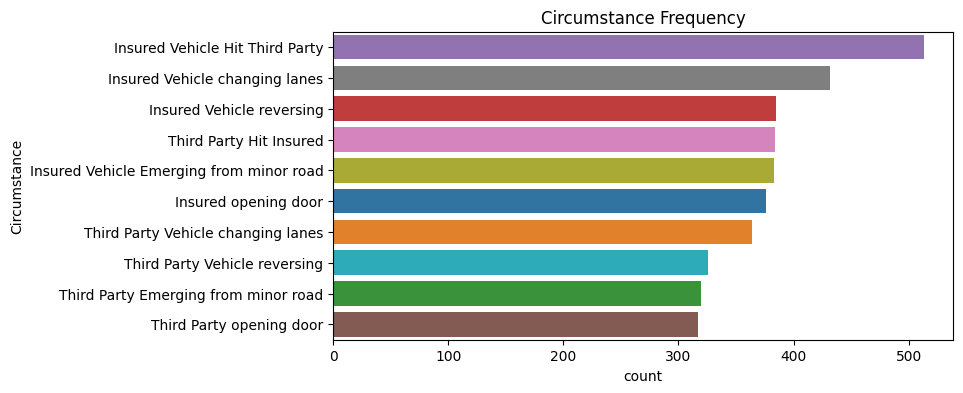

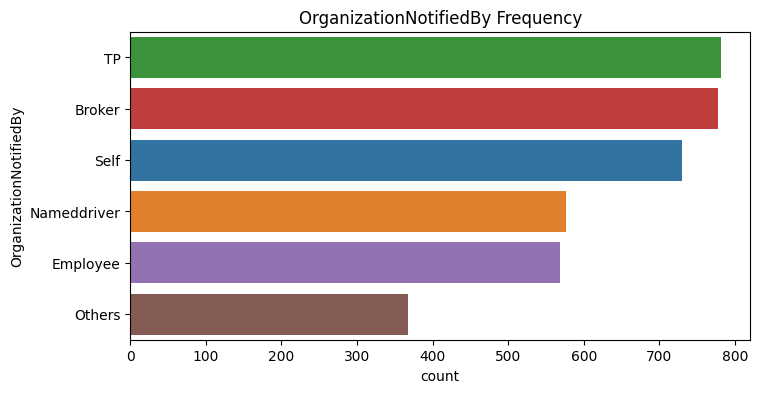

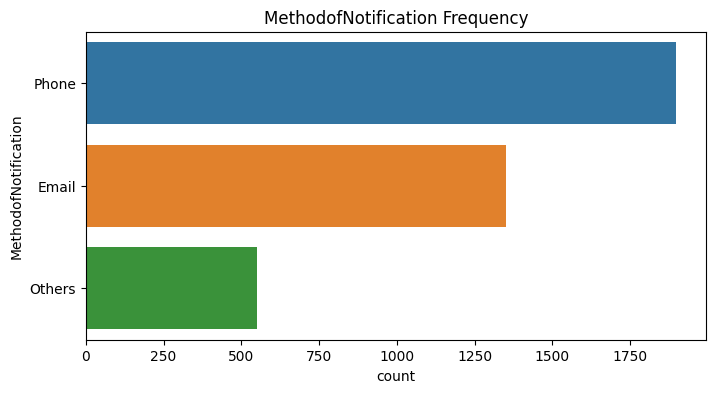

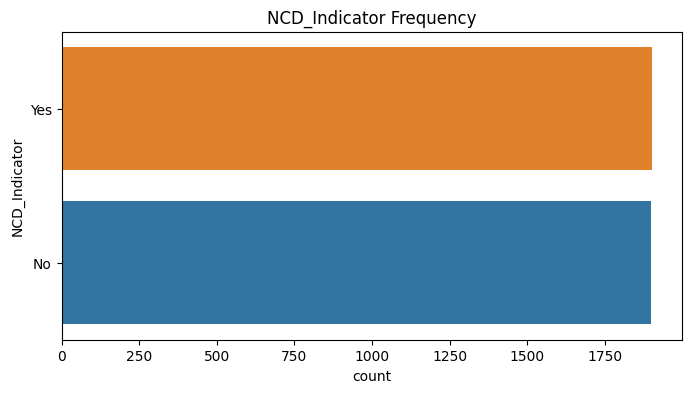

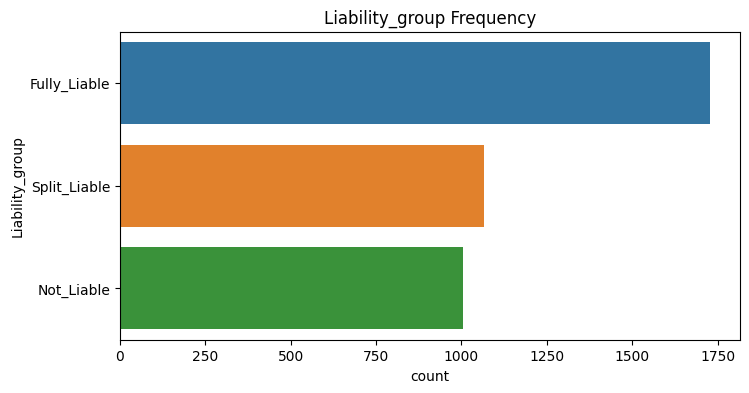

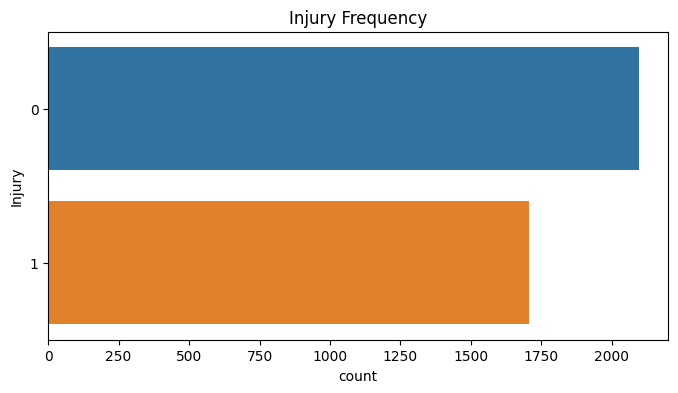

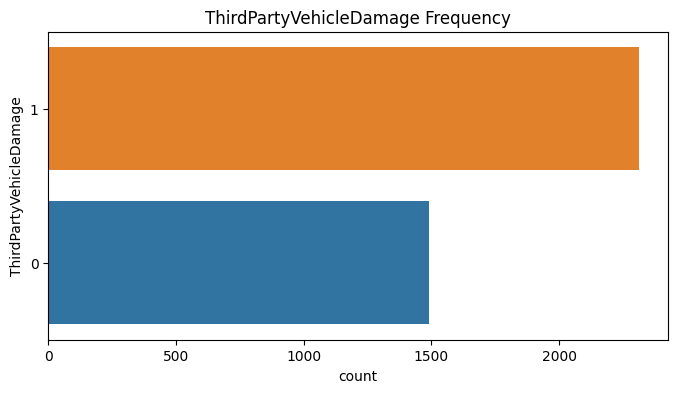

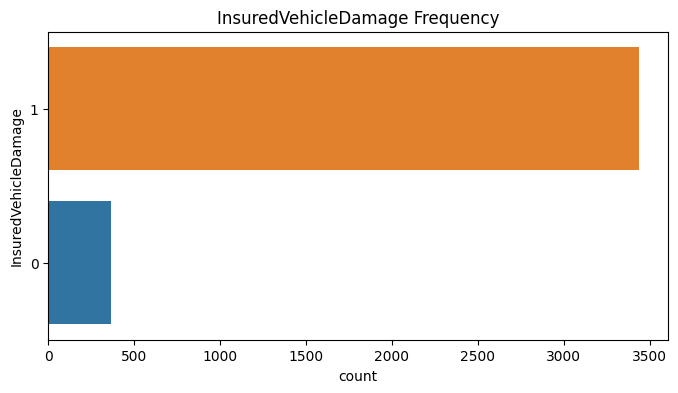

In [17]:
for col in categ_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(
        y=col, 
        hue=col,
        data=df, 
        order=df[col].value_counts().index,
        #palette="Set1"  
        legend=False
    )
    plt.title(f"{col} Frequency")
    plt.show()

In [18]:
target = "Liability_group"

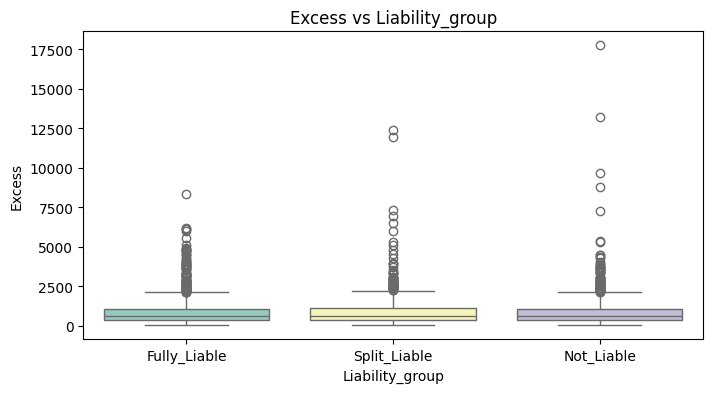

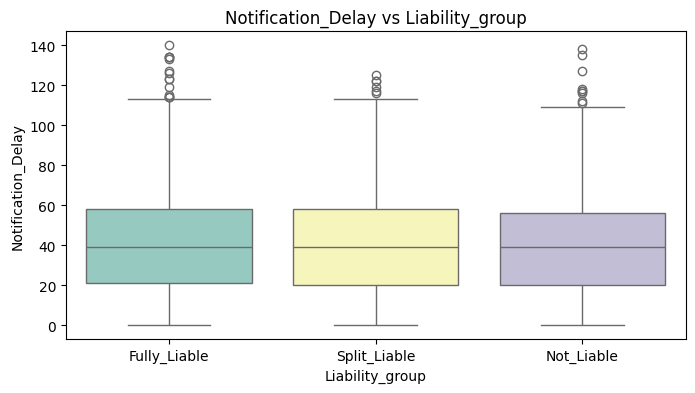

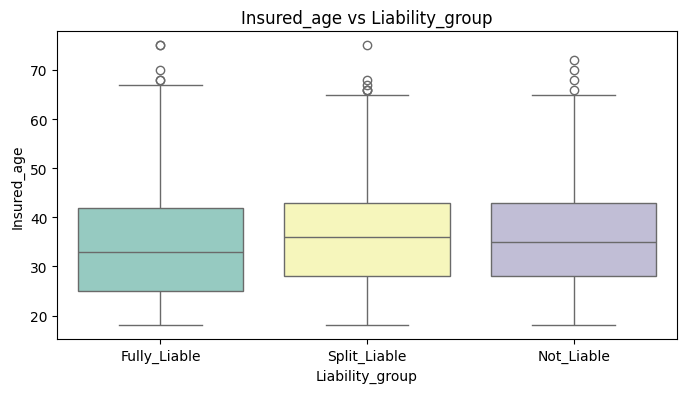

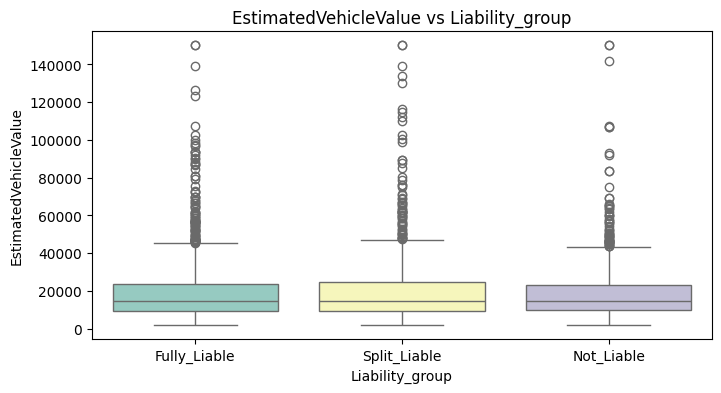

In [19]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=target, y=col,hue=target, data=df, palette="Set3")
    plt.title(f"{col} vs {target}")
    plt.show()

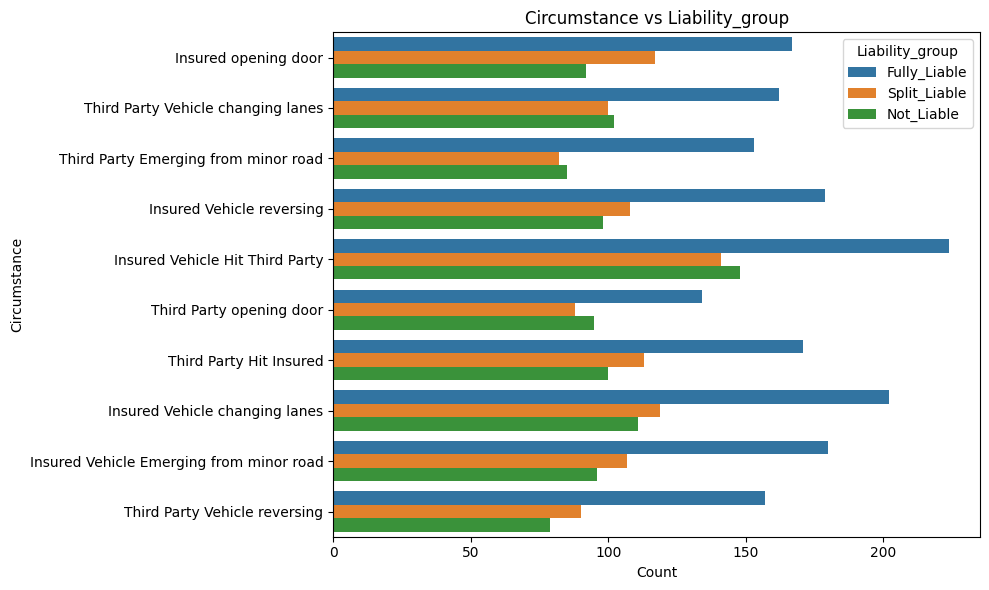

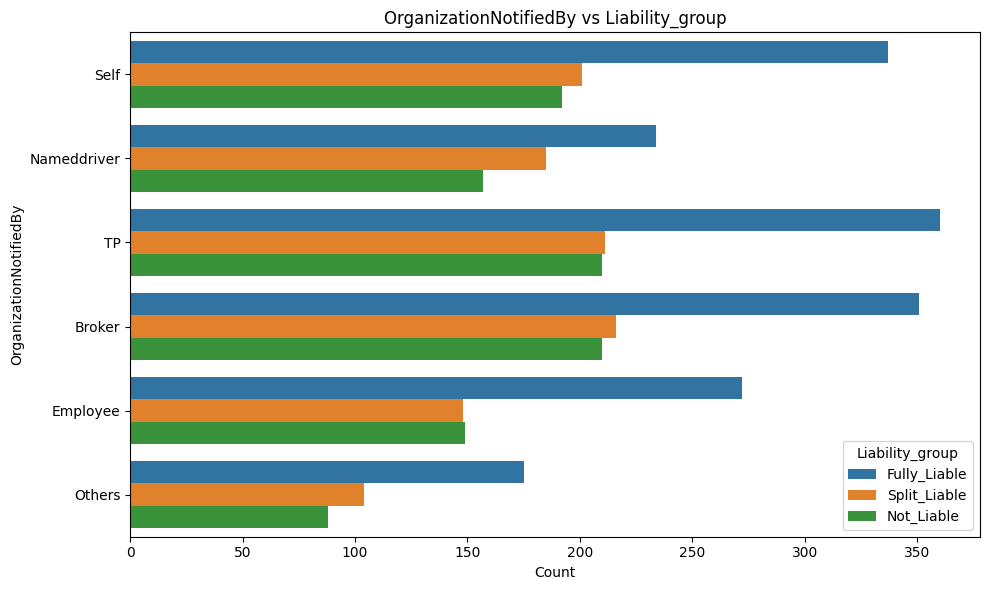

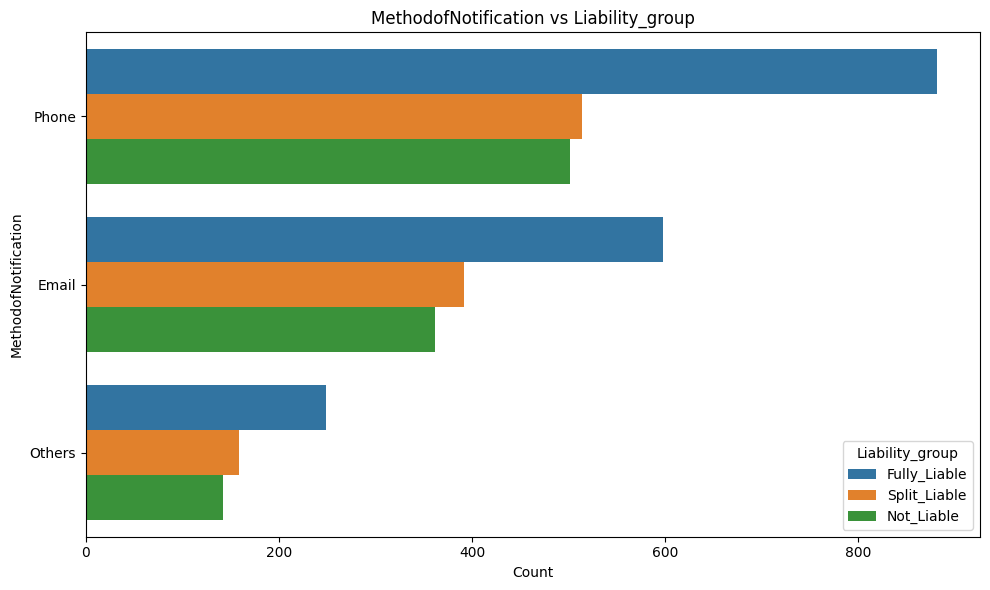

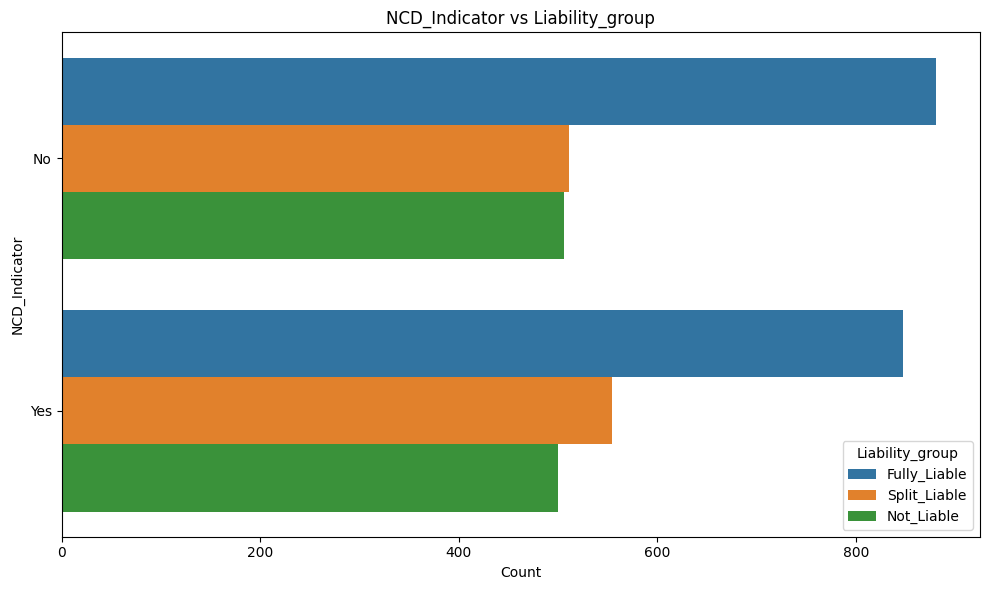

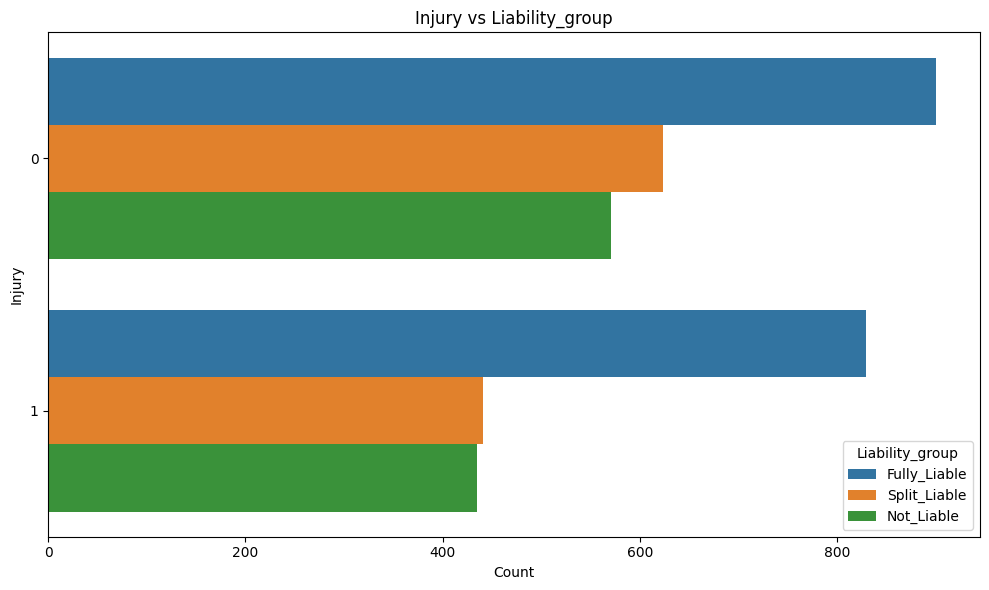

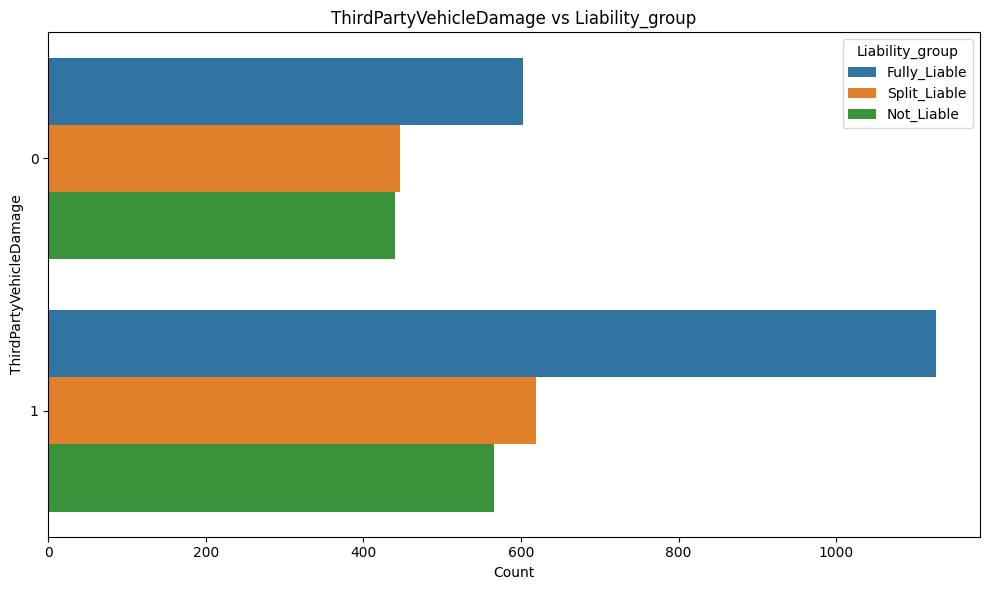

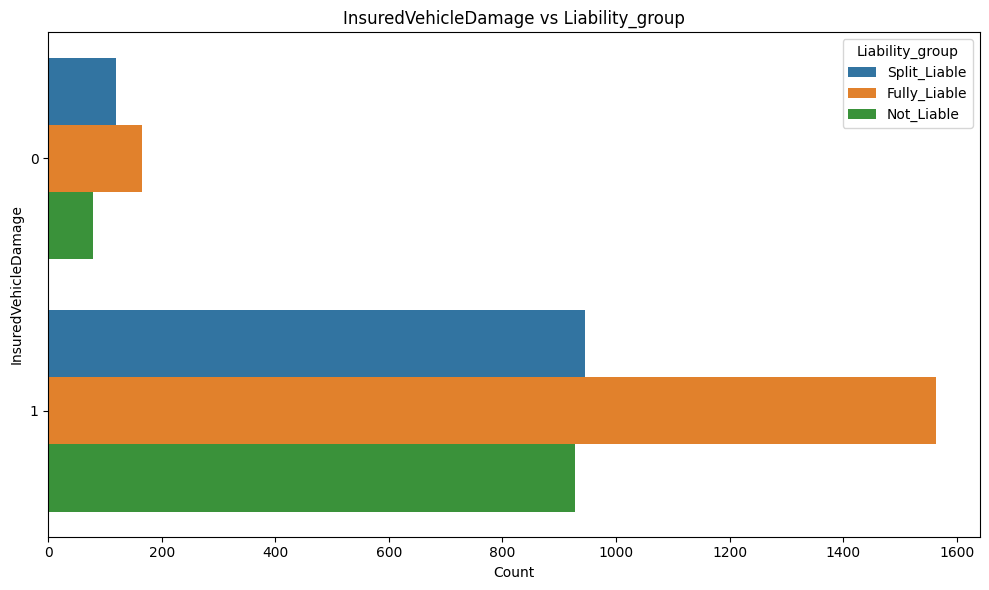

In [20]:
for col in categ_cols:
    if col != target:
        plt.figure(figsize=(10,6))
        sns.countplot(y=col, hue=target, data=df)
        plt.title(f"{col} vs {target}")
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()


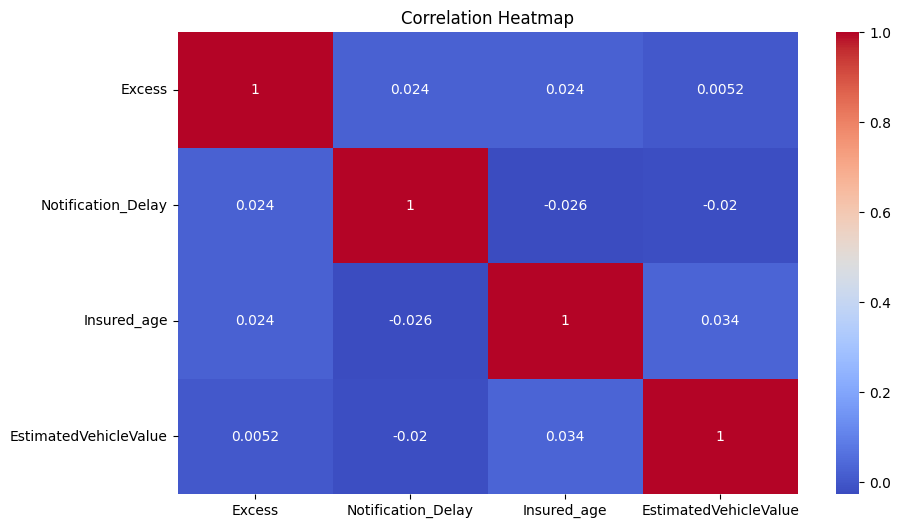

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

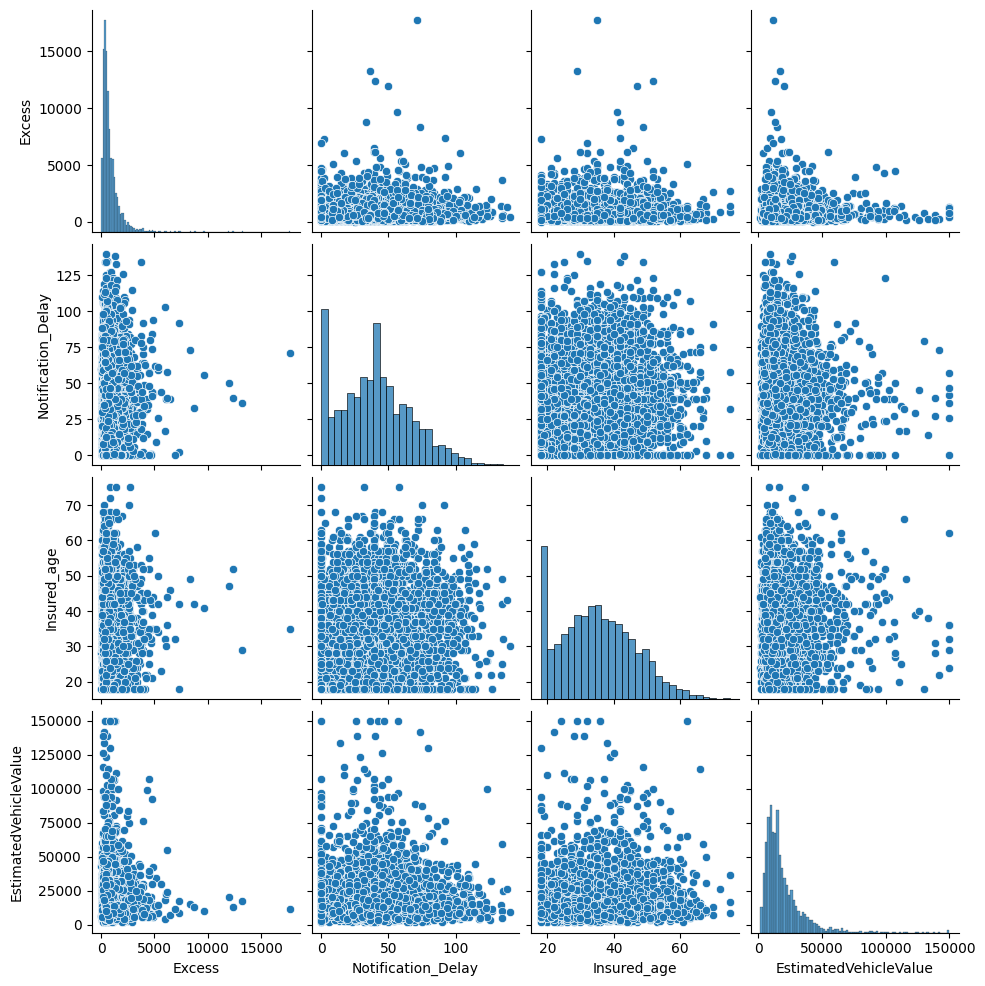

In [22]:
sns.pairplot(df[num_cols[:4]])  
plt.show()


In [23]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")


Excess: 232 outliers
Notification_Delay: 23 outliers
Insured_age: 10 outliers
EstimatedVehicleValue: 212 outliers


In [24]:
Q1 = df['Excess'].quantile(0.25)
Q3 = df['Excess'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5*IQR
df['Excess'] = np.where(df['Excess'] > upper_limit, upper_limit, df['Excess'])


In [25]:
df['Notification_Delay_log'] = np.log1p(df['Notification_Delay'])

In [26]:
df['Insured_age'] = np.clip(df['Insured_age'], 18, 75)

In [27]:
upper_limit = df['EstimatedVehicleValue'].quantile(0.99)
df['EstimatedVehicleValue'] = np.where(df['EstimatedVehicleValue'] > upper_limit,
                                       upper_limit,
                                       df['EstimatedVehicleValue'])

In [28]:
df.describe()

,Excess,Notification_Delay,Injury,ThirdPartyVehicleDamage,InsuredVehicleDamage,Insured_age,EstimatedVehicleValue,Notification_Delay_log
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000
mean,790.008558,40.433158,0.448684,0.608158,0.904211,35.193684,19095.503947,3.280687
std,573.859920,27.038521,0.497425,0.488226,0.294341,11.092962,14818.626892,1.261090
min,21.020000,0.000000,0.000000,0.000000,0.000000,18.000000,1655.000000,0.000000
25%,358.770000,20.000000,0.000000,0.000000,1.000000,27.000000,9482.000000,3.044522
50%,608.485000,39.000000,0.000000,1.000000,1.000000,35.000000,14796.000000,3.688879
75%,1077.537500,58.000000,1.000000,1.000000,1.000000,43.000000,23732.750000,4.077537
max,2155.688750,140.000000,1.000000,1.000000,1.000000,75.000000,89163.500000,4.948760


In [29]:
df.isnull().sum()

Claim_Number               0
Excess                     0
Circumstance               0
OrganizationNotifiedBy     0
MethodofNotification       0
NCD_Indicator              0
Notification_Delay         0
Injury                     0
ThirdPartyVehicleDamage    0
InsuredVehicleDamage       0
Insured_age                0
EstimatedVehicleValue      0
Liability_group            0
Notification_Delay_log     0
dtype: int64

In [30]:
df['Age_Group'] = pd.cut(df['Insured_age'],
                         bins=[17, 25, 40, 60, 76],
                         labels=['Young_Adult', 'Adult', 'Middle_Aged', 'Senior'])

df['Notification_Delay_Group'] = pd.cut(df['Notification_Delay'],
                                        bins=[-1, 7, 30, 90, 365],
                                        labels=['Immediate (0-7d)', 'Short (8-30d)', 'Medium (31-90d)', 'Late (>90d)'])

high_excess_threshold = df['Excess'].quantile(0.75)
df['High_Excess_Flag'] = np.where(df['Excess'] > high_excess_threshold, 1, 0)

df['Luxury_Vehicle_Flag'] = np.where(df['EstimatedVehicleValue'] > 100000, 1, 0)

df['High_Impact_Claim'] = np.where((df['Injury'] == 1) | (df['ThirdPartyVehicleDamage'] == 1), 1, 0)

df['NCD_Indicator_Flag'] = df['NCD_Indicator'].map({'Yes': 1, 'No': 0})

print(['Age_Group', 'Notification_Delay_Group', 'High_Excess_Flag',
       'Luxury_Vehicle_Flag', 'High_Impact_Claim', 'NCD_Indicator_Flag'])

['Age_Group', 'Notification_Delay_Group', 'High_Excess_Flag', 'Luxury_Vehicle_Flag', 'High_Impact_Claim', 'NCD_Indicator_Flag']


In [31]:
display(df.head())

,Claim_Number,Excess,Circumstance,OrganizationNotifiedBy,MethodofNotification,NCD_Indicator,Notification_Delay,Injury,ThirdPartyVehicleDamage,InsuredVehicleDamage,Insured_age,EstimatedVehicleValue,Liability_group,Notification_Delay_log,Age_Group,Notification_Delay_Group,High_Excess_Flag,Luxury_Vehicle_Flag,High_Impact_Claim,NCD_Indicator_Flag
0,CLM100199,324.97,Insured opening door,Self,Phone,No,24.0,0,1,1,20,13746.0,Fully_Liable,3.218876,Young_Adult,Short (8-30d),0,0,1,0
1,CLM103337,1230.03,Third Party Vehicle changing lanes,Nameddriver,Phone,Yes,0.0,1,1,1,42,4864.0,Fully_Liable,0.000000,Middle_Aged,Immediate (0-7d),1,0,1,1
2,CLM101054,441.62,Insured opening door,TP,Phone,No,6.0,0,1,0,43,6407.0,Split_Liable,1.945910,Middle_Aged,Immediate (0-7d),0,0,1,0
3,CLM100825,429.75,Third Party Emerging from minor road,TP,Email,Yes,65.0,1,0,1,18,22253.0,Fully_Liable,4.189655,Young_Adult,Medium (31-90d),0,0,1,1
4,CLM102874,1523.44,Insured Vehicle reversing,Broker,Phone,No,8.0,0,0,1,32,14993.0,Fully_Liable,2.197225,Adult,Short (8-30d),1,0,0,0


In [32]:
if 'Claim_Number' in df.columns:
    df = df.drop(columns=['Claim_Number'])

y = df['Liability_group']
X = df.drop(columns=['Liability_group'])

categ_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical Columns: {categ_cols}")

Categorical Columns: ['Circumstance', 'OrganizationNotifiedBy', 'MethodofNotification', 'NCD_Indicator', 'Age_Group', 'Notification_Delay_Group']


In [33]:
X_encoded = pd.get_dummies(X, columns=categ_cols, drop_first=True)
print(X_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 35 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Excess                                             3800 non-null   float64
 1   Notification_Delay                                 3800 non-null   float64
 2   Injury                                             3800 non-null   int64  
 3   ThirdPartyVehicleDamage                            3800 non-null   int64  
 4   InsuredVehicleDamage                               3800 non-null   int64  
 5   Insured_age                                        3800 non-null   int64  
 6   EstimatedVehicleValue                              3800 non-null   float64
 7   Notification_Delay_log                             3800 non-null   float64
 8   High_Excess_Flag                                   3800 non-null   int64  
 9   Luxury_V

In [34]:
print([col for col in X_encoded.columns if "Liability_group" in col])

[]


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [37]:
skewed_cols = ['Excess', 'Notification_Delay', 'EstimatedVehicleValue']

for col in skewed_cols:
    if col in X_train.columns: 
        X_train[col] = np.log1p(X_train[col])
        X_test[col] = np.log1p(X_test[col])


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
print(f"Data Split: {X_train.shape[0]} training samples, {X_test.shape[0]} test samples")

Data Split: 3040 training samples, 760 test samples


In [39]:
print(y_train.value_counts())
print(y_test.value_counts())


Liability_group
Fully_Liable    1383
Split_Liable     852
Not_Liable       805
Name: count, dtype: int64
Liability_group
Fully_Liable    346
Split_Liable    213
Not_Liable      201
Name: count, dtype: int64


In [40]:
!pip install shap

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'var_smoothing': np.float64(1.0)}
Gaussian Naive Bayes Performance

Training Accuracy: 0.4526
Test Accuracy: 0.4500

Classification Report:
              precision    recall  f1-score   support

Fully_Liable       0.46      0.94      0.62       346
  Not_Liable       0.30      0.04      0.07       201
Split_Liable       0.31      0.04      0.07       213

    accuracy                           0.45       760
   macro avg       0.36      0.34      0.25       760
weighted avg       0.37      0.45      0.32       760



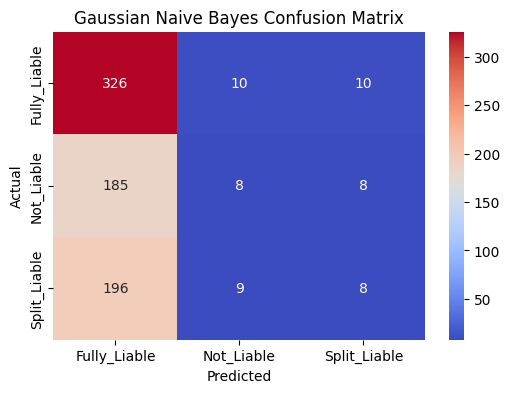

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=nb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", grid.best_params_)

y_pred_train = grid.predict(X_train_scaled)
y_pred_test = grid.predict(X_test_scaled)

print("Gaussian Naive Bayes Performance\n")

print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test, labels=grid.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.show()

Before SMOTE: Liability_group
Fully_Liable    1383
Split_Liable     852
Not_Liable       805
Name: count, dtype: int64
After SMOTE: Liability_group
Split_Liable    1383
Fully_Liable    1383
Not_Liable      1383
Name: count, dtype: int64
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 300}
Random Forest Performance with SMOTE

Training Accuracy: 0.8954
Test Accuracy: 0.4079

Classification Report (Test Set):
              precision    recall  f1-score   support

Fully_Liable       0.50      0.62      0.56       346
  Not_Liable       0.29      0.20      0.23       201
Split_Liable       0.29      0.25      0.27       213

    accuracy                           0.41       760
   macro avg       0.36      0.36      0.35       760
weighted avg       0.38      0.41      0.39       760



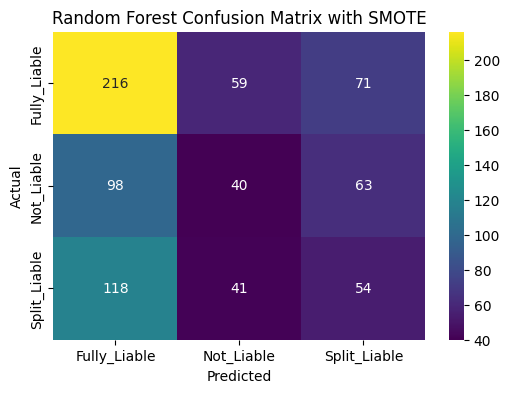

In [46]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_res).value_counts())

rf = RandomForestClassifier(random_state=42, class_weight=None)  

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10],
    'max_features': ['sqrt']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_weighted',  
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train_res, y_train_res)

print("Best Hyperparameters:", grid_rf.best_params_)

y_pred_train = grid_rf.predict(X_train_scaled)
y_pred_test = grid_rf.predict(X_test_scaled)

print("Random Forest Performance with SMOTE\n")
print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.4f}\n")

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test, labels=grid_rf.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=grid_rf.classes_, yticklabels=grid_rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix with SMOTE")
plt.show()

In [43]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_train.columns:", X_train.columns)

X_train_scaled shape: (3040, 35)
X_train.columns: Index(['Excess', 'Notification_Delay', 'Injury', 'ThirdPartyVehicleDamage',
       'InsuredVehicleDamage', 'Insured_age', 'EstimatedVehicleValue',
       'Notification_Delay_log', 'High_Excess_Flag', 'Luxury_Vehicle_Flag',
       'High_Impact_Claim', 'NCD_Indicator_Flag',
       'Circumstance_Insured Vehicle Hit Third Party',
       'Circumstance_Insured Vehicle changing lanes',
       'Circumstance_Insured Vehicle reversing',
       'Circumstance_Insured opening door',
       'Circumstance_Third Party Emerging from minor road',
       'Circumstance_Third Party Hit Insured',
       'Circumstance_Third Party Vehicle changing lanes',
       'Circumstance_Third Party Vehicle reversing',
       'Circumstance_Third Party opening door',
       'OrganizationNotifiedBy_Employee', 'OrganizationNotifiedBy_Nameddriver',
       'OrganizationNotifiedBy_Others', 'OrganizationNotifiedBy_Self',
       'OrganizationNotifiedBy_TP', 'MethodofNotification_

100%|===================| 2270/2280 [02:43<00:00]        

SHAP Summary for class: Fully_Liable


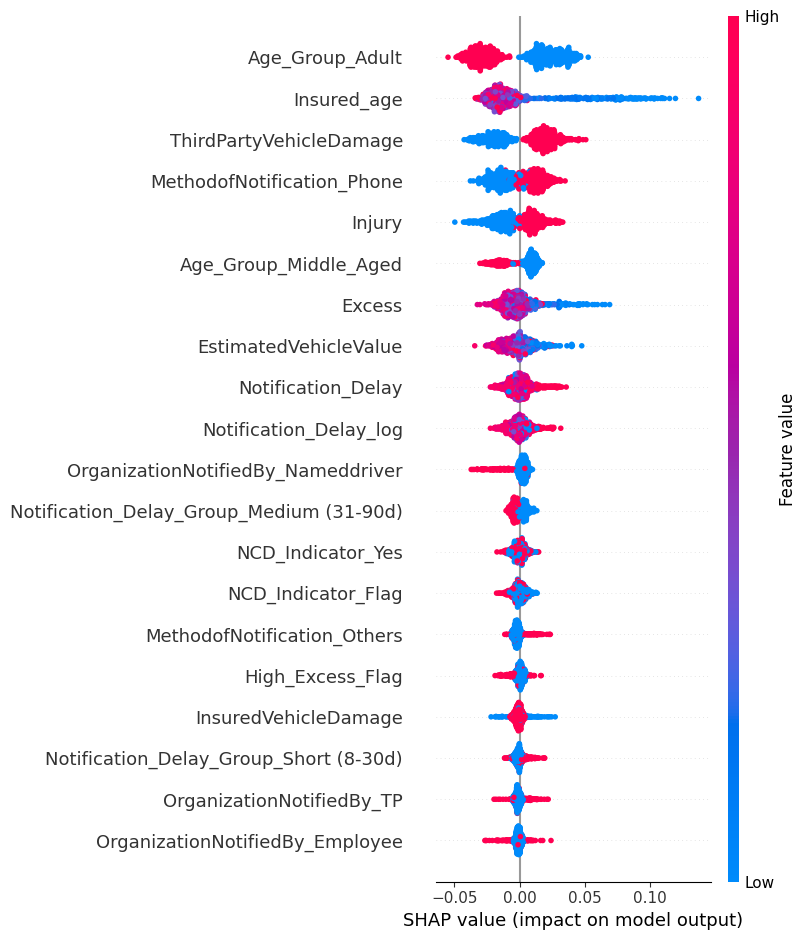

SHAP Summary for class: Not_Liable


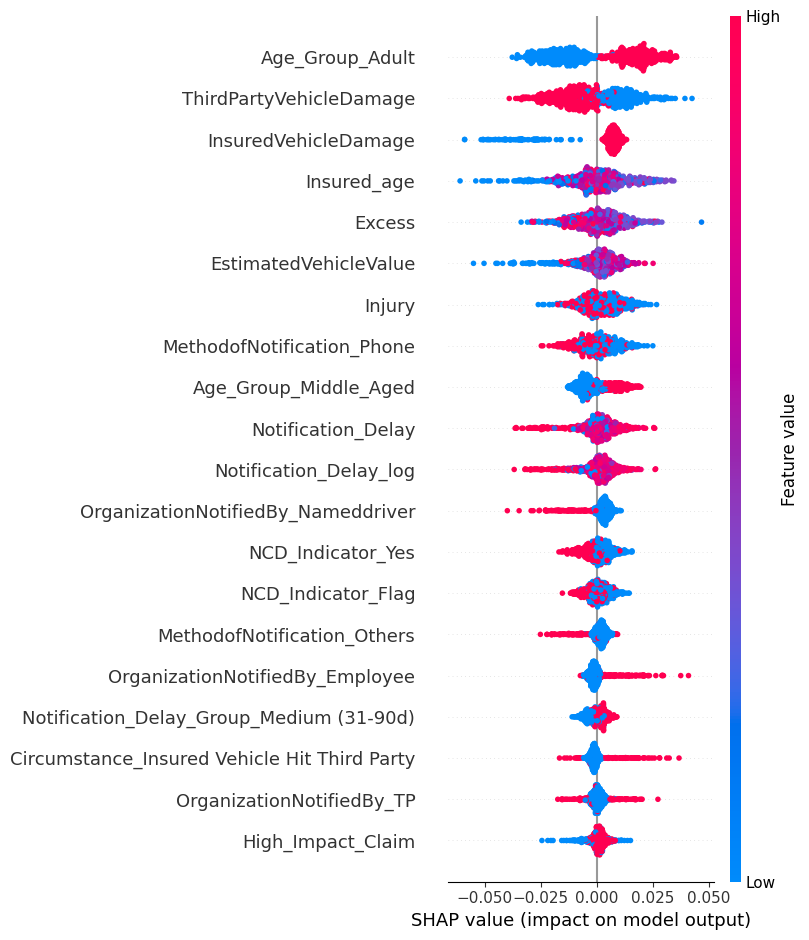

SHAP Summary for class: Split_Liable


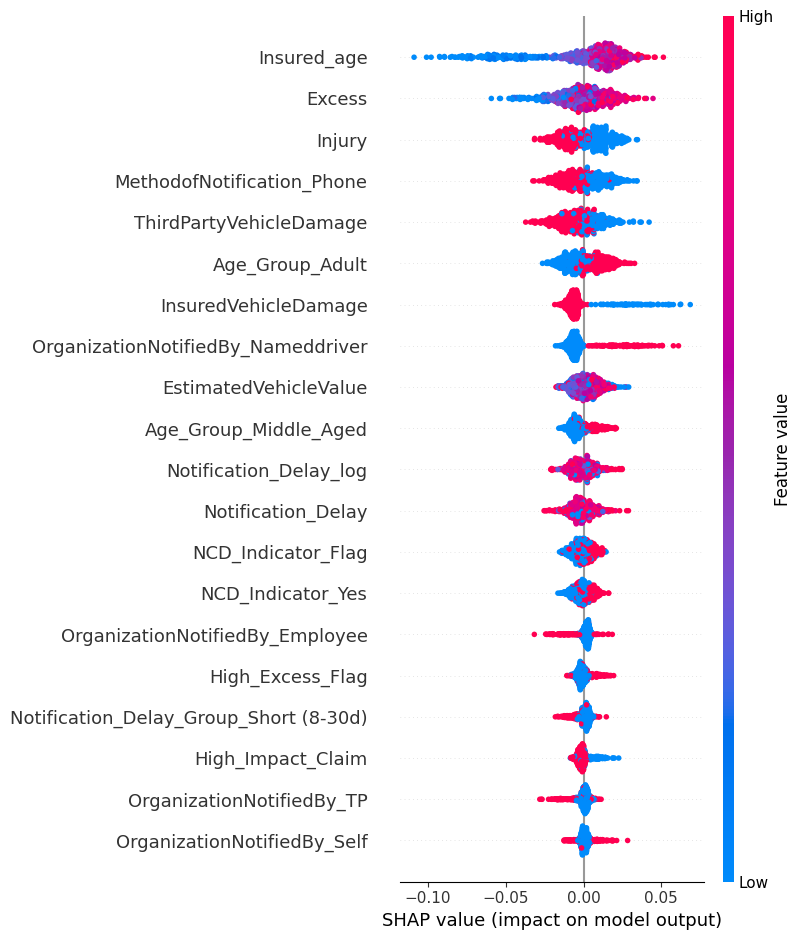

In [48]:
import shap
import pandas as pd

X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)
best_rf = grid_rf.best_estimator_
explainer = shap.Explainer(best_rf, X_train_df)

shap_values = explainer(X_test_df)

for i, class_name in enumerate(best_rf.classes_):
    print(f"SHAP Summary for class: {class_name}")
    shap.summary_plot(
        shap_values.values[:,:,i], 
        X_test_df,
        feature_names=X_test_df.columns
    )


Class Weights: {np.int64(0): np.float64(0.7327066763075439), np.int64(1): np.float64(1.25879917184265), np.int64(2): np.float64(1.189358372456964)}
Fitting 5 folds for each of 162 candidates, totalling 810 fits


c:\Users\NANDANA\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:22:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
XGBoost with Class Weights Performance

Training Accuracy: 0.4684
Test Accuracy: 0.4066

Weighted F1 Score (Test): 0.4140849499526354

Classification Report:
              precision    recall  f1-score   support

Fully_Liable       0.58      0.41      0.48       346
  Not_Liable       0.31      0.38      0.34       201
Split_Liable       0.34      0.43      0.38       213

    accuracy                           0.41       760
   macro avg       0.41      0.41      0.40       760
weighted avg       0.44      0.41      0.41       760



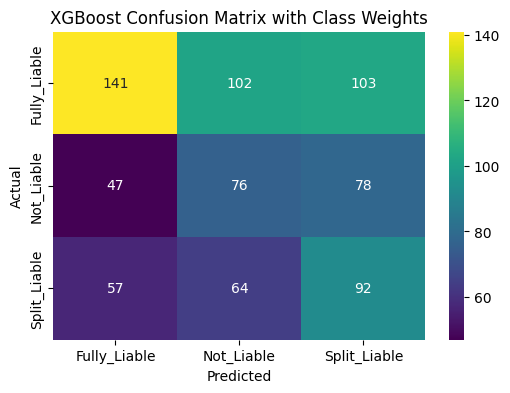

In [49]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

classes = np.unique(y_train_enc)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_enc)
class_weight_dict = dict(zip(classes, class_weights))
print("Class Weights:", class_weight_dict)

xgb = XGBClassifier(
    objective='multi:softmax',   
    num_class=len(classes),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1_weighted',  
    cv=cv,
    n_jobs=-1,
    verbose=1
)

sample_weights = np.array([class_weight_dict[c] for c in y_train_enc])
grid_xgb.fit(X_train_scaled, y_train_enc, sample_weight=sample_weights)

print("Best Hyperparameters:", grid_xgb.best_params_)

y_pred_train_enc = grid_xgb.predict(X_train_scaled)
y_pred_test_enc = grid_xgb.predict(X_test_scaled)

y_pred_train = le.inverse_transform(y_pred_train_enc)
y_pred_test = le.inverse_transform(y_pred_test_enc)

print("XGBoost with Class Weights Performance\n")
print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.4f}\n")
print("Weighted F1 Score (Test):", f1_score(y_test, y_pred_test, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test, labels=le.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix with Class Weights")
plt.show()

 99%|===================| 2264/2280 [00:15<00:00]        

SHAP Summary (beeswarm) for class: Fully_Liable


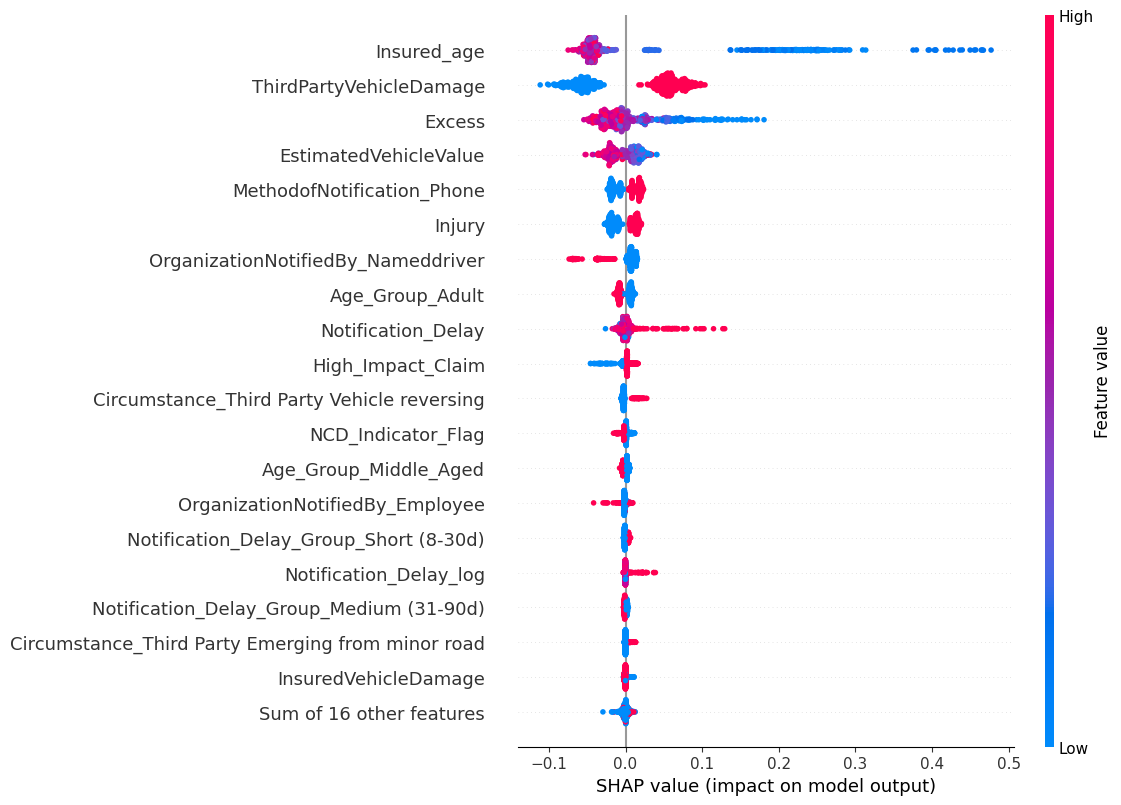

SHAP Summary (beeswarm) for class: Not_Liable


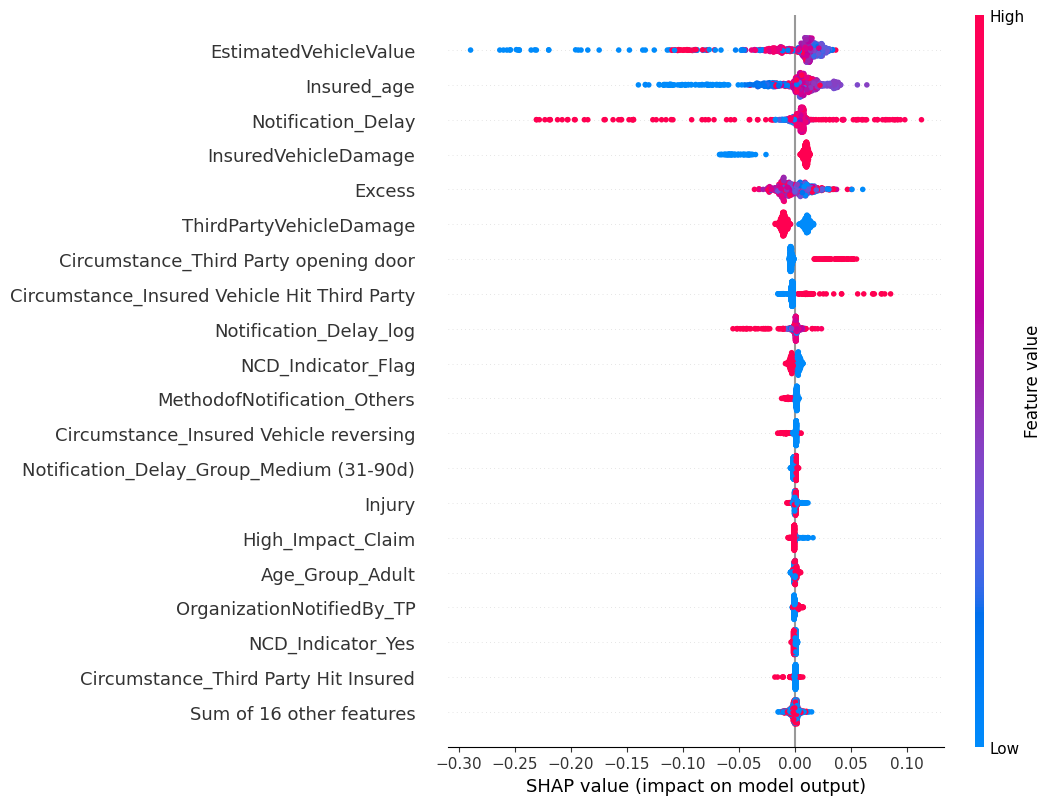

SHAP Summary (beeswarm) for class: Split_Liable


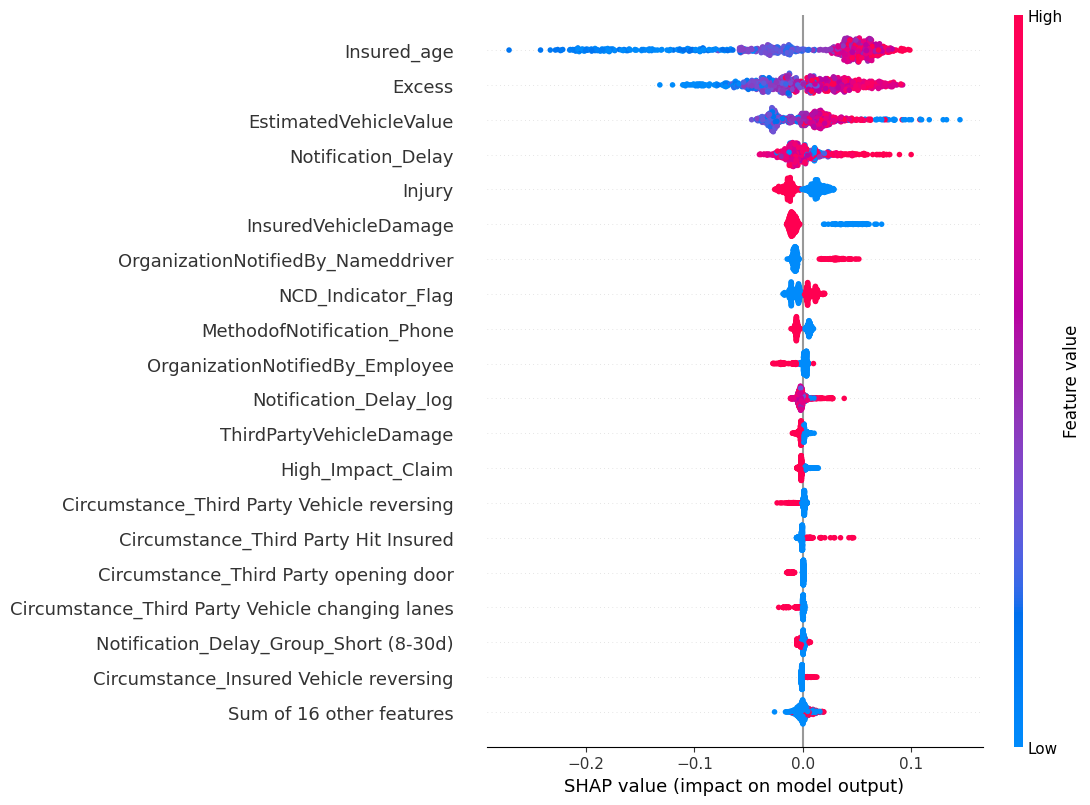

In [50]:
import shap
import pandas as pd

X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

explainer = shap.Explainer(grid_xgb.best_estimator_, X_train_df)

shap_values = explainer(X_test_df)

for i, class_name in enumerate(le.classes_):
    print(f"SHAP Summary (beeswarm) for class: {class_name}")
    shap.plots.beeswarm(shap_values[:, :, i], max_display=20)
